# Лабораторная работа №7
## Решение задачи Коши
##  
## Вариант 3
### Задание:
1. Решить методом Хойна задачу Коши:
$$y"+5y'+2y=x*e^{-x},\quad y(0)=1,\quad y'(0)=0, \quad 0 < x < 2,$$ построить график решения и фазовые траеткории.
2. Обеспечить работу программы с системой дифференциальных уравнений первого порядка в режиме «черного ящика» (black box).
3. Найти точное решение, сравнить найденное решение с точным.
4. Найти решение с помощью метода Рунге-Кутты кратности 4-5.
___
## Метод Хойна - метод Рунге-Кутты 2-го порядка
Идея этого метода заключается в построении функций $ϕ$, которые не используют явно производных функции $f(x,y)$ и в то же время ”наилучшим образом” приближают соответствующие отрезки $ϕ_p$ ряда Тейлора, который используется для построения последующего приближения по предыдущему. Продемонстрируем процесс ”подгонки” рядов Тейлора следующим образом. Положим $ϕ(x,y,h)≡c_1f(x,y) + c_2f(x + ha_2,y + b_{21}hf(x,y))$, где $c_1, c_2,a_2,b_{21}$ - постоянные, подлежащие определению. Разлагая $ϕ$ по степеням $h$ до членов порядка $h^2$, получим $$ϕ(x,y,h) = (c_1 + c_2)f(x,y) + hc_2[a_2f_x(x,y) + b_{21}f_y(x,y)f(x,y)] + O(h^2).$$ С другой стороны,
$$\delta(x,y,h) = f(x,y) +\frac{1}{2}h[f_x(x,y) + f_y(x,y)f(x,y)] + O(h^2).$$  Отсюда видно, что взяв  $$c_1 + c_2 = 1$$ $$c_2a_2 = \frac{1}{2}$$ $$c_2b_{21} = \frac{1}{2}$$  получаем функцию, для которой $ϕ(x,y,h)−\delta(x,y,h) = O(h^2)$. Алгебраическая система имеет множество решений вида
$$c_1 = 1−α$$ $$c_2 = α$$ $$a_2 = b_{21} =\frac{1}{2}α$$

где $α$ - свободный параметр. При $α = \frac{1}{2}$, в частности, получаем двукратный метод Рунге-Кутты, метод Хойна: $$y_{n+1} = y_n + \frac{h}{2}[f(x_n,y_n) + f(x_{n+1},y_n + hf(x_n,y_n))],$$ $$y_0 = y_0,$$ $$n = 0,N −1, x_n ∈ωN,$$ требующий всего два вычисления функции $f(x,y)$ на каждом шаге. 

### 4-х кратный метод Рунге-Кутты:
Продолжая подобные выкладки, можно получить метод кратности 4:
$$y_{n+1} = y_n + \frac{h}{ 6}(k_1 + 2k_2 + 2k_3 + k_4)$$ $$y0 = y0, n = 0,...,N −1, x_n ∈ω_N$$ $$k_1 ≡f(x_n,y_n)$$ $$k_2 ≡f(x_n +\frac{1}{ 2}h,y_n + \frac{1}{ 2}hk_1)$$ $$k_3 ≡f(x_n + \frac{1}{ 2}h,y_n + \frac{1}{ 2}hk_2)$$ $$k_4 ≡f(x_n + h,y_n + hk_3)$$ Алгоритмы Рунге-Кутты отлично приспособлены для практических вычислений: они не требуют вычисления дополнительных начальных данных и легко позволяют менять шаг $h$. 

## Решение уравнения заданным методом-методом Хойна(метод Рунге-Кутты 2-го порядка), сравнение полученного решения с решением заданного уравнения втроенной функцией SciPy.integrate - odeint(...)

In [1]:
%matplotlib inline

from numpy import sin, linspace, exp, array, dot, sqrt, cos, zeros
from numpy.linalg import norm
import matplotlib.pyplot as plt
from scipy.integrate import *

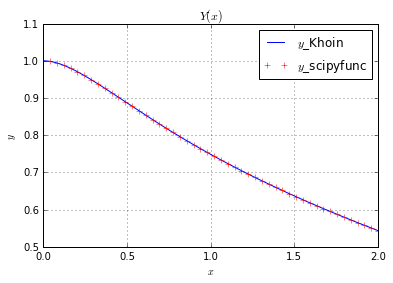

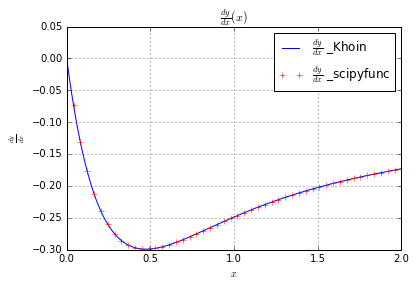

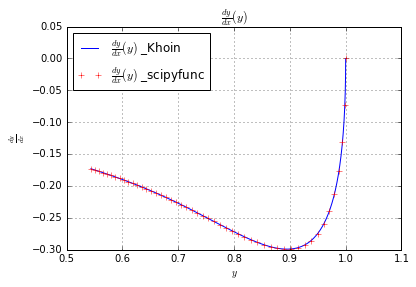

In [12]:
def f(y, t):
    f = zeros((2),'float')
    f[0] = y[1]
    f[1] = -5*y[1]-2*y[0]+t*exp(-t)
    return f

#решение встроенной функцией(из описания функции следует, что используется в ней метод Адамса)
t = linspace(0,2,50)
result = odeint(f,[1,0],t)
x = result[:,0]
v = result[:,1]

#решение заданным методом
e=0.0001                   #точность
x0=0                     #начало
x1=2                     #конец
u=[1, 0]                 #начальные условия
def hoinmethod(f, f0, t0, t1, e):#правая часть, начальная правая часть, Т0, Т1, начальное количество точек, точность
    n=2
    vv=[0,0]*n
    kh=1000
    while kh>e:#точность по разбиению 
        v0=f0
        v=[]
        t=t0
        h=(t1-t0)/n
        while t<=t1:#цикл по отрезку
            v1=v0+dot(f(v0, t)+f(v0+dot(h, f(v0, t)), t+h), h/2)
            v0=v1
            v.append(v0)
            t+=h
        kh=norm(vv[1]-v[1], 1)/norm(v[1], 1)
        vv1=v
        vv=vv1
        n*=2
    return array(v)
u=hoinmethod(f, u, t0, t1, e)
c=u[:, 0]; d=u[:, 1];
tt=linspace(x0, x1, len(c))

plt.title('$Y(x)$')
plt.plot(tt, c, 'b-', label='$y$_Khoin')
plt.plot(t, x, 'r+', label='$y$_scipyfunc')
plt.legend(loc=0)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.show()

plt.title('$\\frac{dy}{dx}(x)$')
plt.grid(True)
plt.plot(tt, d, 'b-', label='$\\frac{dy}{dx}$ _Khoin' )
plt.plot(t, v,'r+', label='$ \\frac{dy}{dx}$ _scipyfunc')
plt.legend(loc=0)
plt.xlabel('$x$')
plt.ylabel('$\\frac{dy}{dx}$')
plt.show()

plt.title('$\\frac{dy}{dx}(y)$')
plt.grid(True)
plt.plot(c, d, 'b-', label='$\\frac{dy}{dx}(y)$ _Khoin' )
plt.plot(x, v,'r+', label='$ \\frac{dy}{dx}(y)$ _scipyfunc')
plt.legend(loc=0)
plt.xlabel('$y$')
plt.ylabel('$\\frac{dy}{dx}$')
plt.show()

## Решение заданного уравнения методом Рунге-Кутты 4-го порядка(кратности 4)

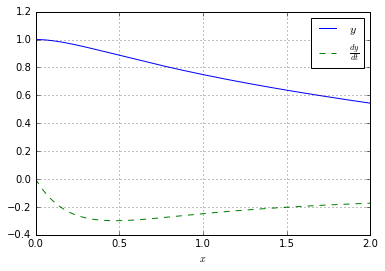

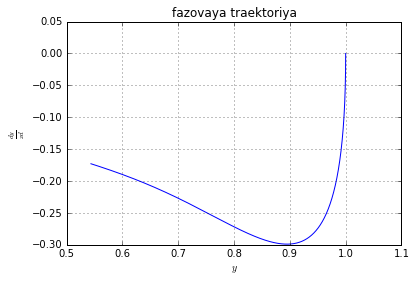

In [13]:
def increment(f, t, y, tau):
        k0 =tau*f(t,y)
        k1 =tau*f(t+tau/2.,y+k0/2.)
        k2 =tau*f(t+tau/2.,y+k1/2.)
        k3 =tau*f(t+tau, y + k2)
        return (k0 + 2.*k1 + 2.*k2 + k3) / 6.

def rungeKutta(f, t0, y0, tEnd, tau):
    t = []
    y = []
    t.append(t0)
    y.append(y0)
    while t0 < tEnd:
        tau = min(tau, tEnd - t0)
        y0 = y0 + increment(f, t0, y0, tau)
        t0 = t0 + tau
        t.append(t0)
        y.append(y0)
    return array(t), array(y)

#исходное уравнение в виде системы уравнений первого порядка
def f(t, y):
    f = zeros((2),'float')
    f[0] = y[1]
    f[1] = -5*y[1]-2*y[0]+t*exp(-t)
    return f


t0 = x0
tEnd = x1
y0 = array([1., 0.])
tau = 0.0000025
t, y = rungeKutta(f, t0, y0, tEnd, tau)
for n in range(0, 2):
    r = y [:, n]
    st = '$y$'
    sg = '-'
    if n == 1:
        st = '$\\frac{d y}{dt}$'
        sg ='--'
    plt.plot(t, r, sg, label=st)
plt.legend(loc=0)
plt.xlabel('$x$')
plt.grid(True)
plt.show()

plt.grid(True)
plt.title('fazovaya traektoriya')
plt.xlabel('$y$')
plt.ylabel('$\\frac{dy}{xd}$')
plt.plot(y[:, 0], y[:, 1])
plt.show()

## "Черный ящик" для заданного метода, а также построение точного решения и сравнение его с полученным "черным ящиком"

In [14]:
def blackbox(f, f0, t0, t1, e):#правая часть, начальная правая часть, Т0, Т1, начальное количество точек, точность
    n=2
    vv=[0,0]*n
    kh=1000
    while kh>e:#точность по разбиению 
        v0=f0
        v=[]
        t=t0
        h=(t1-t0)/n
        while t<=t1:#цикл по отрезку
            v1=v0+dot(f(v0, t)+f(v0+dot(h, f(v0, t)), t+h), h/2)
            v0=v1
            v.append(v0)
            t+=h
        kh=norm(vv[1]-v[1], 1)/norm(v[1], 1)
        vv1=v
        vv=vv1
        n*=2
    return array(v)




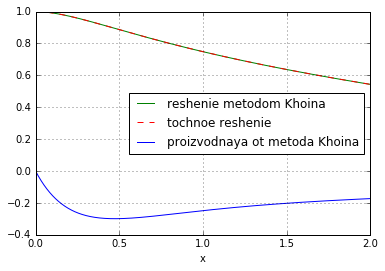

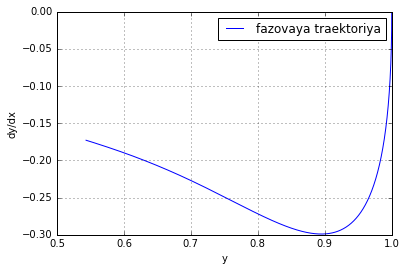

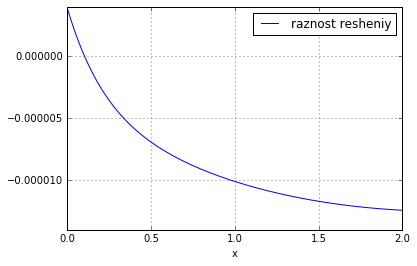

In [15]:

#исходное уравнение записанное в виде системы уравнений первого порядка
def f(y, t):
    f = zeros((2),'float')
    f[0] = y[1]
    f[1] = -5*y[1]-2*y[0]+t*exp(-t)
    return f

t0=0
t1=2
f0=[1, 0]
eps=0.0001
d=blackbox(f, f0, t0, t1, eps)
y=d[:,0]
dy=d[:,1]

tt=linspace(t0, t1, len(y))


#точное решение задачи
fx=0.00735294*2.71828**(-4.56155*tt)*(-34*2.71828**(3.56155*tt)*(2*tt + 3) + 255.062*2.71828**(4.12311*tt) - 17.0625)


plt.grid(True)
plt.plot(tt, y, 'g-', label='reshenie metodom Khoina')
plt.plot(tt, fx, 'r--', label='tochnoe reshenie')
plt.plot(tt, dy, label='proizvodnaya ot metoda Khoina')
plt.xlabel('x')
plt.legend(loc=0)
plt.show()

plt.grid(True)
plt.plot(y, dy, label='fazovaya traektoriya')
plt.xlabel('y')
plt.ylabel('dy/dx')
plt.legend(loc=0)
plt.show()

plt.plot(tt, y-fx, label='raznost resheniy')
plt.legend(loc=0)
plt.xlabel('x')
plt.grid(True)
plt.show()